In [1]:
import pandas as pd
import numpy as np
import nltk


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
movie=pd.read_csv('movies.csv')
movie.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [5]:
movie.shape

(100, 5)

In [8]:
movie["plot"]=movie["wiki_plot"].astype(str)+"\n"+ movie["imdb_plot"].astype(str)

movie.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [10]:
print(movie["plot"][0])

On the day of his only daughter's wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito's godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter's wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito's youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito's godson   Johnny Fontane  Johnny Fontane  , a popular sing

# Tokenization

In [11]:
import re

sent_tokenized=[sent for sent in nltk.sent_tokenize("""Today (May 19, 2016) is his only daughter's wedding.
                                                        Vito Corleone is the Godfather.""")]

print(sent_tokenized)

word_tokenized=[word for word in nltk.word_tokenize(sent_tokenized[0])]

print(word_tokenized)

filtered=[word for word in word_tokenized if re.search('[a-zA-Z]',word)]

print(filtered)

["Today (May 19, 2016) is his only daughter's wedding.", 'Vito Corleone is the Godfather.']
['Today', '(', 'May', '19', ',', '2016', ')', 'is', 'his', 'only', 'daughter', "'s", 'wedding', '.']
['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']


# Stemming

In [12]:
from nltk.stem.snowball import SnowballStemmer

stemmer=SnowballStemmer("english")

stem_word=[stemmer.stem(word) for word in filtered]

print(stem_word)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


# Merge together tokenize & Stem

In [19]:
def tokenize_and_stem(text):
    tokens=[word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    filtered_tokens=[token for token in tokens if re.search('[a-zA-Z]',token) ]
    
    stems=[stemmer.stem(t) for t in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


# Create Term Frequency-Inverse Document Frequency (TF-IDF)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, 
                                 stop_words='english', use_idf=True,
                                tokenizer=tokenize_and_stem, ngram_range=(1,3))

# Fit transform TfidfVectorizer

In [21]:
tfidf_matrix=tfidf_vectorizer.fit_transform([x for x in movie["plot"]])

tfidf_matrix.shape

/Users/sumedha/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


(100, 564)

# Import KMeans and create clusters

In [25]:
from sklearn.cluster import KMeans

np.random.seed(5)

km=KMeans(n_clusters=5)

km.fit(tfidf_matrix)

clusters=km.labels_.tolist()

movie["cluster"]=clusters

movie["cluster"].value_counts()

2    35
1    21
3    20
0    17
4     7
Name: cluster, dtype: int64

# Calculate similarity distance

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_distance=1-cosine_similarity(tfidf_matrix)

# Create merging and plot dendrogram

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.hierarchy import linkage,dendrogram

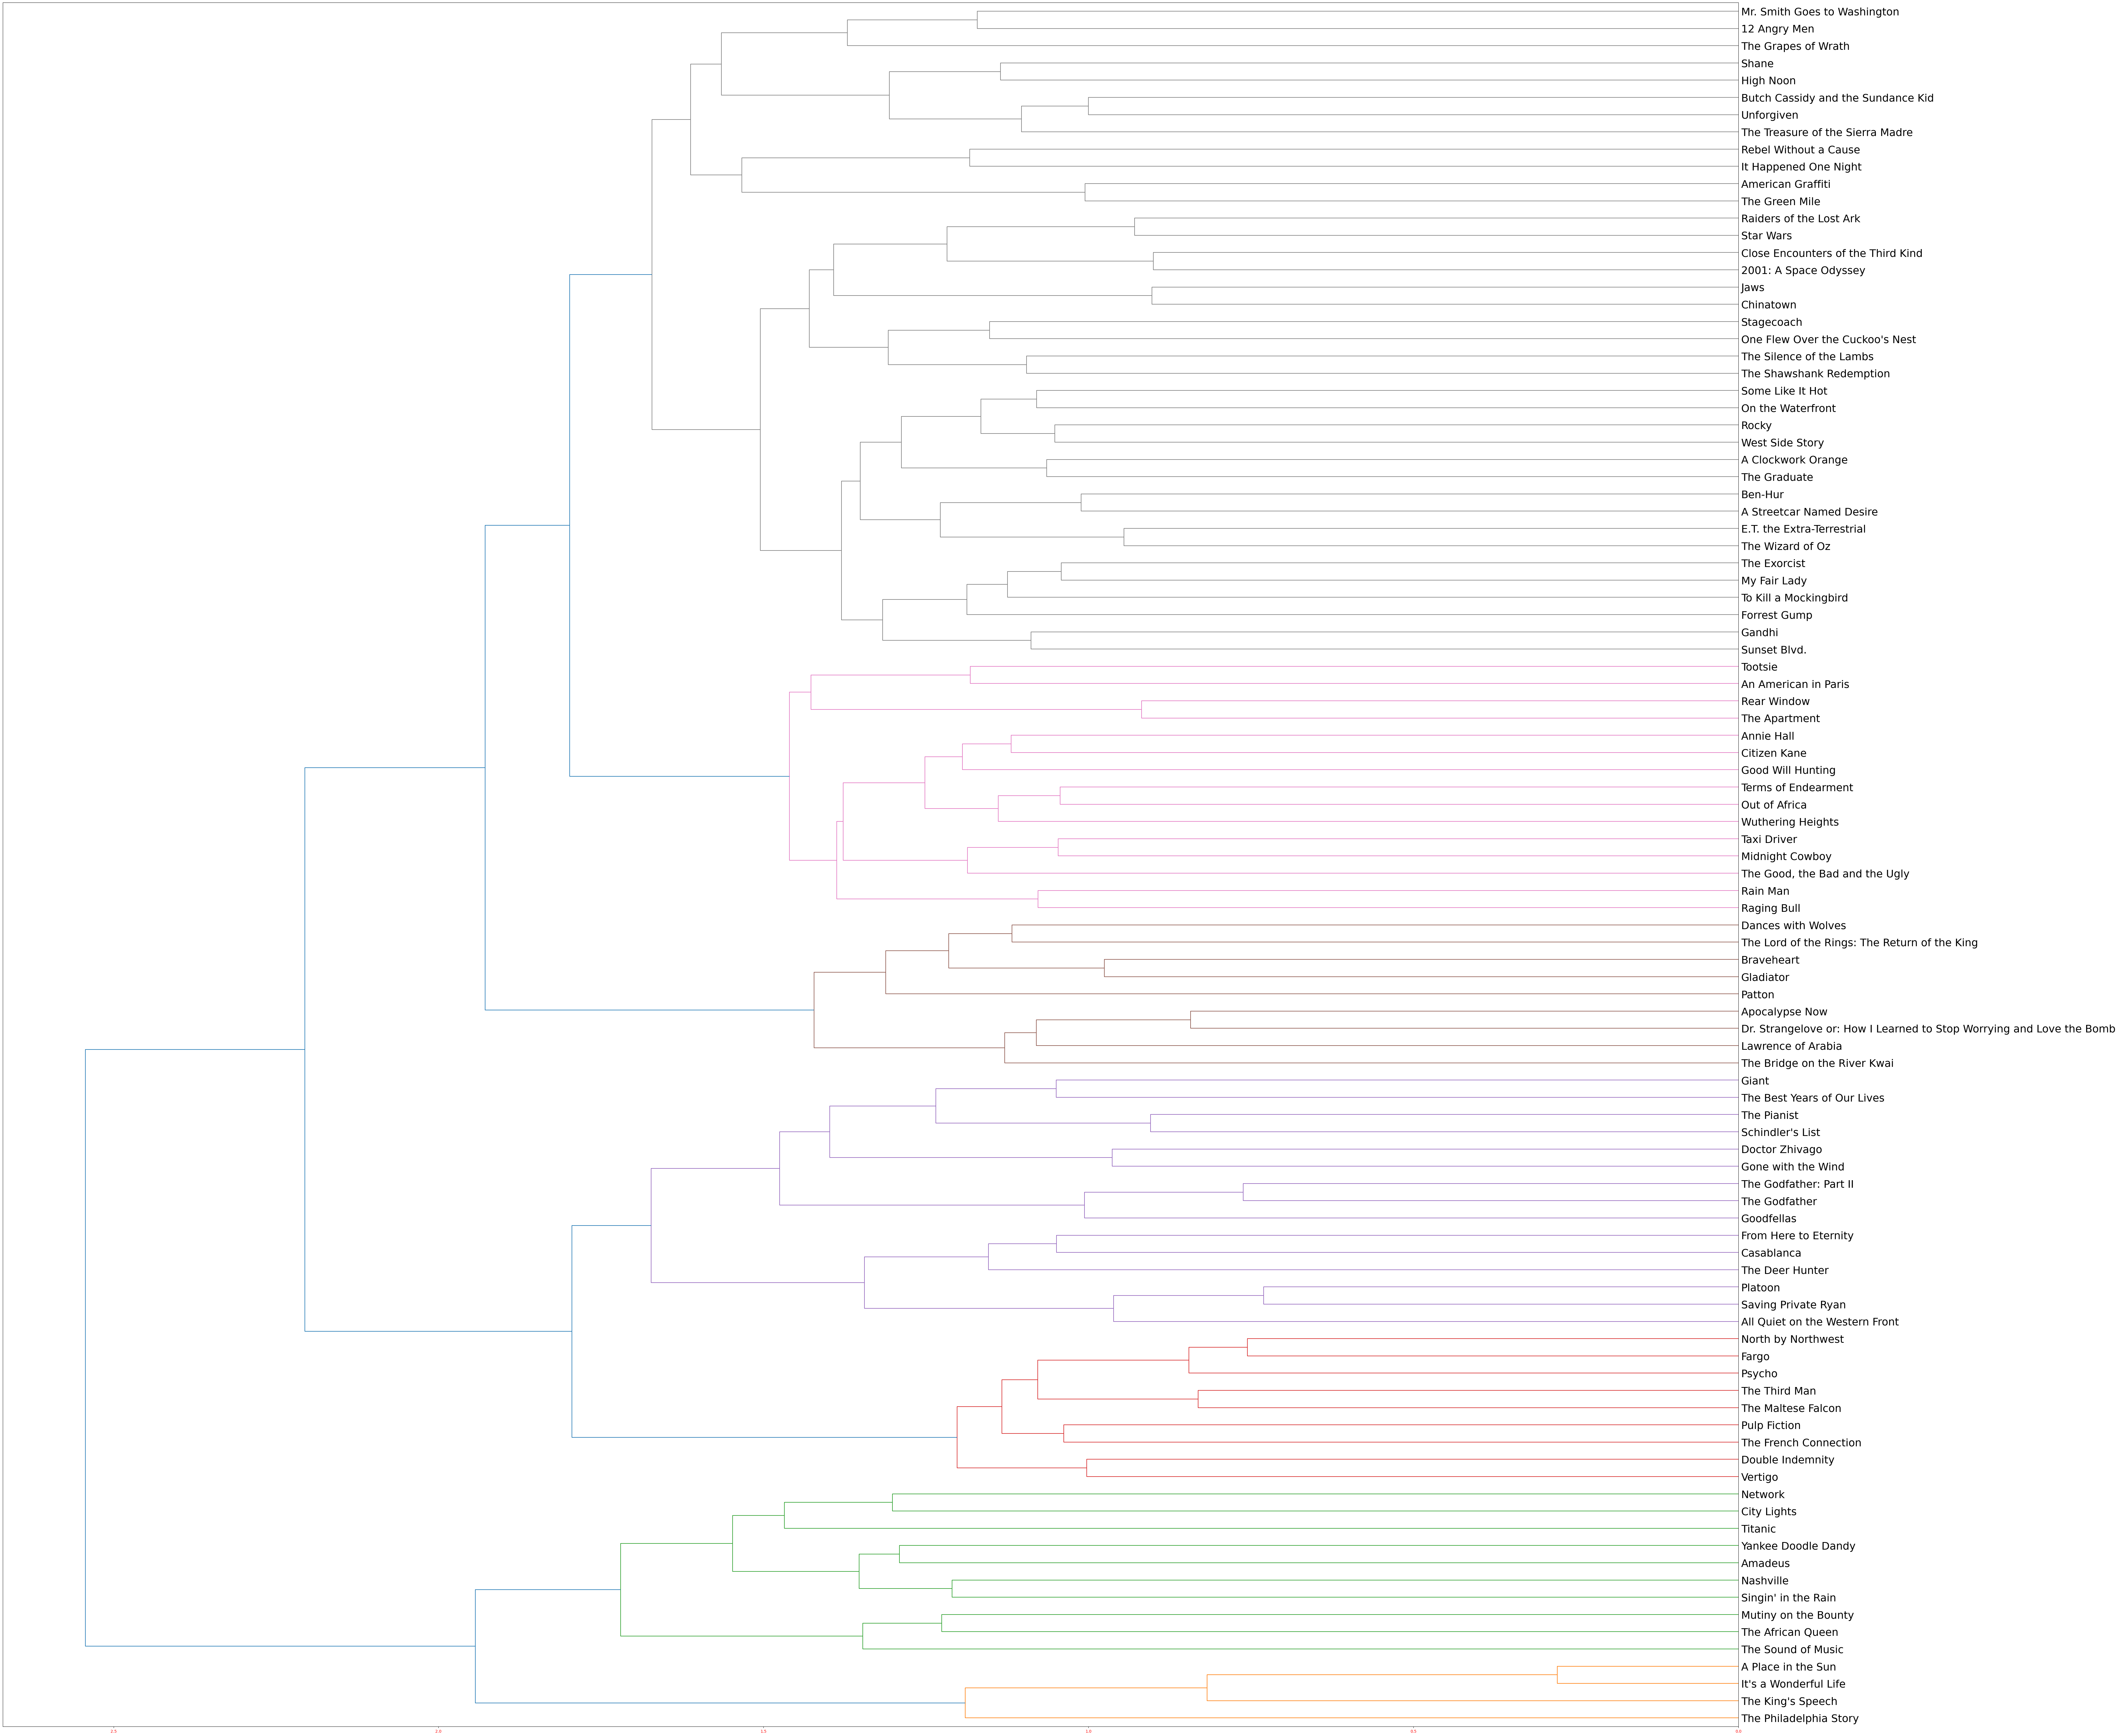

In [42]:
merge=linkage(similarity_distance,method="complete")

dendo=dendrogram(merge,orientation="left", labels=[x for x in movie["title"]],leaf_font_size=27)

fig=plt.gcf()
p=[lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(80,80)

plt.show()